In [74]:
# Read the data
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [278]:
# Import metrics
import random

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [75]:
os.getcwd()

'D:\\Insofe\\Python Lab\\Transactions'

In [76]:
os.chdir('D:\\Insofe\\Python Lab\\Transactions')

In [77]:
# Read the Train Input files
train_demo = pd.read_csv('Train_Policy_Demographics-1542969243754.csv')
#train_demo = train_demo.drop(['ClaimID'],axis=1)
train_claim = pd.read_csv('Train_ClaimDetails-1542969243754.csv')
#train_claim = train_claim.drop(['ClaimID'],axis=1)
train_reg = pd.read_csv("Train-1542969243754.csv")
#train_reg = train_reg.drop(['ClaimID'],axis=1)

In [78]:
#print(train_demo.head(5))
#print("\n")
#print(train_claim.head(5))
#print("\n")
#print(train_reg.head(5))
#print("\n")
print(train_demo.shape, train_claim.shape, train_reg.shape)

(14417, 10) (14417, 55) (14417, 2)


In [221]:
# Read the Train Input files
test_demo = pd.read_csv('Test_Policy_Demographics-1542969243754.csv')
#test_demo = test_demo.drop(['ClaimID'],axis=1)
test_claim = pd.read_csv('Test_ClaimDetails-1542969243754.csv')
#test_claim = test_claim.drop(['ClaimID'],axis=1)
test_reg = pd.read_csv("Test-1542969243754.csv")
#test_reg = test_reg.drop(['ClaimID'],axis=1)

In [206]:
print(test_demo.head(5))
print("\n")
print(test_claim.head(5))
print("\n")
print(test_reg.head(5))
print("\n")
print(test_demo.shape, test_claim.shape, test_reg.shape)

  PolicyID  PolicyType  PolicyForm Employment_status  BusinessClass  \
0  P275003           1           1                 Y              6   
1  P275006           1           1                 N             26   
2  P275016           2           1                 N              7   
3  P275017           2           1                 Y              7   
4  P275020           2           1                 Y              7   

   Perperson_Policylimit  PerOccurrence_PolicyLimit  CombinedSingleLimit  \
0                      0                          0              2500000   
1                      0                    1000000                    0   
2                      0                          0              2000000   
3                      0                          0              2000000   
4                      0                          0               100000   

    ClaimID  PolicyLimitPerInjury  
0  CLM51003               2500000  
1  CLM51006               1000000  
2  CLM51

In [81]:
train_new = pd.merge(train_reg, train_claim, on='ClaimID')

In [82]:
train =  pd.merge(train_new, train_demo, on='ClaimID')

In [83]:
train.head(5)

,ClaimID,ClaimSize,Injury_Date,Date_reported,Age_Injured,Work_related_injury_status,Amputation,Death,Burns_heat,Burns_chemical,...,OtherCollateralSources,PolicyID,PolicyType,PolicyForm,Employment_status,BusinessClass,Perperson_Policylimit,PerOccurrence_PolicyLimit,CombinedSingleLimit,PolicyLimitPerInjury
0,CLM56529,lessthan100K,3/9/2000,2000-03-23,5900,N,NaN,NaN,NaN,NaN,...,NaN,P280529,1,1,Y,17,0,0,5000000,5000000
1,CLM66153,lessthan100K,12/6/2002,2002-12-10,3700,N,NaN,NaN,NaN,NaN,...,NaN,P290153,2,1,Y,9,0,5000000,0,5000000
2,CLM58861,lessthan100K,10/20/2000,2000-11-02,3700,N,NaN,NaN,NaN,NaN,...,NaN,P282861,2,1,Y,6,0,0,5000000,5000000
3,CLM67972,200KandAbove,8/9/2003,2003-08-11,1600,NaN,NaN,A,NaN,NaN,...,NaN,P291972,4,2,N,20,0,1000000,3000000,1000000
4,CLM69075,lessthan100K,2/25/2004,2004-02-26,5200,NaN,NaN,NaN,NaN,NaN,...,NaN,P293075,2,1,N,6,0,1000000,0,1000000


In [222]:
test_new = pd.concat([test_claim,test_reg], axis=1)


In [223]:
test = pd.merge(test_new, test_demo, on='ClaimID')

In [224]:
test.head(5)

,ClaimID,Injury_Date,Date_reported,Age_Injured,Work_related_injury_status,Amputation,Death,Burns_heat,Burns_chemical,SystemicPoisoning_toxic,...,Provider,PolicyID,PolicyType,PolicyForm,Employment_status,BusinessClass,Perperson_Policylimit,PerOccurrence_PolicyLimit,CombinedSingleLimit,PolicyLimitPerInjury
0,CLM51003,5/18/1989,1989-11-28,4600,Y,NaN,NaN,C,NaN,NaN,...,PRV51002,P275003,1,1,Y,6,0,0,2500000,2500000
1,CLM51006,5/17/1989,1990-02-20,3100,NaN,NaN,NaN,NaN,NaN,NaN,...,PRV51006,P275006,1,1,N,26,0,1000000,0,1000000
2,CLM51016,5/11/1992,1992-06-23,1400,NaN,NaN,NaN,NaN,NaN,NaN,...,PRV51009,P275016,2,1,N,7,0,0,2000000,2000000
3,CLM51017,5/11/1992,1992-06-23,4400,N,NaN,NaN,NaN,NaN,NaN,...,PRV51010,P275017,2,1,Y,7,0,0,2000000,2000000
4,CLM51020,12/20/1992,1993-01-07,4200,N,NaN,A,NaN,NaN,NaN,...,PRV51018,P275020,2,1,Y,7,0,0,100000,100000


In [87]:
train.shape

(14417, 65)

In [225]:
test.shape

(4806, 65)

In [89]:
train.columns

Index(['ClaimID', 'ClaimSize', 'Injury_Date', 'Date_reported', 'Age_Injured',
       'Work_related_injury_status', 'Amputation', 'Death', 'Burns_heat',
       'Burns_chemical', 'SystemicPoisoning_toxic', 'SystemicPoisoning_other',
       'Eye_injury_blindness', 'RespiratoryCondition', 'NervousCondition',
       'HearingLoss', 'CirculatoryCondition', 'MultipleInjuries', 'BackInjury',
       'SkinDisorder', 'BrainDamage', 'Scarring', 'SpinalCordInjuries',
       'OtherInjuries', 'OffRoadVehicle', 'AirTransportation', 'Railway',
       'OtherMotorVehicle', 'SurgicalCare', 'Falls', 'Drowning',
       'UseOfDefectiveProduct', 'Fire', 'Firearm', 'Pollution_ToxicExposure',
       'Explosions', 'UseOfAgrlMachinery', 'Oil_gasExtraction',
       'OtherModeOfInjury', 'Non_economicloss', 'Exemplarydamages',
       'WhetherPrimaFacie_JointandSeveralLiability', 'WorkersCompAvailability',
       'CollateralSourcesAvailability', 'MedicalInsurance',
       'DisabilityInsurance', 'SocialSecurityBenefits

In [90]:
test.columns

Index(['ClaimID', 'Injury_Date', 'Date_reported', 'Age_Injured',
       'Work_related_injury_status', 'Amputation', 'Death', 'Burns_heat',
       'Burns_chemical', 'SystemicPoisoning_toxic', 'SystemicPoisoning_other',
       'Eye_injury_blindness', 'RespiratoryCondition', 'NervousCondition',
       'HearingLoss', 'CirculatoryCondition', 'MultipleInjuries', 'BackInjury',
       'SkinDisorder', 'BrainDamage', 'Scarring', 'SpinalCordInjuries',
       'OtherInjuries', 'OffRoadVehicle', 'AirTransportation', 'Railway',
       'OtherMotorVehicle', 'SurgicalCare', 'Falls', 'Drowning',
       'UseOfDefectiveProduct', 'Fire', 'Firearm', 'Pollution_ToxicExposure',
       'Explosions', 'UseOfAgrlMachinery', 'Oil_gasExtraction',
       'OtherModeOfInjury', 'Non_economicloss', 'Exemplarydamages',
       'WhetherPrimaFacie_JointandSeveralLiability', 'WorkersCompAvailability',
       'CollateralSourcesAvailability', 'MedicalInsurance',
       'DisabilityInsurance', 'SocialSecurityBenefits', 'Medicare_

In [91]:
train.dtypes

ClaimID                                              object
ClaimSize                                            object
Injury_Date                                          object
Date_reported                                        object
Age_Injured                                           int64
Work_related_injury_status                           object
Amputation                                           object
Death                                                object
Burns_heat                                           object
Burns_chemical                                       object
SystemicPoisoning_toxic                              object
SystemicPoisoning_other                              object
Eye_injury_blindness                                 object
RespiratoryCondition                                 object
NervousCondition                                     object
HearingLoss                                          object
CirculatoryCondition                    

In [92]:
test.dtypes

ClaimID                                              object
Injury_Date                                          object
Date_reported                                        object
Age_Injured                                           int64
Work_related_injury_status                           object
Amputation                                           object
Death                                                object
Burns_heat                                           object
Burns_chemical                                       object
SystemicPoisoning_toxic                              object
SystemicPoisoning_other                              object
Eye_injury_blindness                                 object
RespiratoryCondition                                 object
NervousCondition                                     object
HearingLoss                                          object
CirculatoryCondition                                 object
MultipleInjuries                        

In [94]:
train_labels = train.pop('ClaimSize')

In [ ]:
trian = train.drop('ClaimID',axis=1, inplace=True)


In [97]:
train.shape

(14417, 63)

In [226]:
test = test.drop('ClaimID',axis=1)

In [227]:
test.shape

(4806, 64)

In [100]:
# For loading .arff files
from scipy.io import arff
# To perform mean imputation
from sklearn.preprocessing import Imputer
#To perform kFold Cross Validation
from sklearn.model_selection import KFold
# Formatted counter of class labels
from collections import Counter
# Ordered Dictionary
from collections import OrderedDict
# Library imbalanced-learn to deal with the data imbalance. To use SMOTE oversampling
from imblearn.over_sampling import SMOTE 
# To analyze the type of missing data
import missingno as msno
# Library for performing k-NN and MICE imputations 
import fancyimpute

# To perform mean imputation
from sklearn.preprocessing import Imputer

In [101]:
# Impoting classification models
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [102]:
# Import metrics
from sklearn import metrics

In [103]:
print(train.shape,test.shape)

(14417, 63) (4806, 64)


In [104]:
# Converting Object type to Catogry

for col in train.columns:
   if (train[col].dtype == "object"):
       train[col] = train[col].astype('category')

for col in train.columns:
   if (train[col].dtype == np.float64):
       train[col] = train[col].fillna(0).astype(np.int64)
    


In [228]:
for col in test.columns:
   if (test[col].dtype == "object"):
       test[col] = test[col].astype('category')
        
for col in test.columns:
   if (test[col].dtype == np.float64):
       test[col] = test[col].fillna(0).astype(np.int64)

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14417 entries, 0 to 14416
Data columns (total 63 columns):
Injury_Date                                         14417 non-null category
Date_reported                                       14417 non-null category
Age_Injured                                         14417 non-null int64
Work_related_injury_status                          9367 non-null category
Amputation                                          151 non-null category
Death                                               1710 non-null category
Burns_heat                                          197 non-null category
Burns_chemical                                      67 non-null category
SystemicPoisoning_toxic                             51 non-null category
SystemicPoisoning_other                             28 non-null category
Eye_injury_blindness                                130 non-null category
RespiratoryCondition                                98 non-null category
Ne

In [106]:
train['Age_Injured'] = train['Age_Injured']/100

In [107]:
train.head(5)

,Injury_Date,Date_reported,Age_Injured,Work_related_injury_status,Amputation,Death,Burns_heat,Burns_chemical,SystemicPoisoning_toxic,SystemicPoisoning_other,...,OtherCollateralSources,PolicyID,PolicyType,PolicyForm,Employment_status,BusinessClass,Perperson_Policylimit,PerOccurrence_PolicyLimit,CombinedSingleLimit,PolicyLimitPerInjury
0,3/9/2000,2000-03-23,59.0,N,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,P280529,1,1,Y,17,0,0,5000000,5000000
1,12/6/2002,2002-12-10,37.0,N,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,P290153,2,1,Y,9,0,5000000,0,5000000
2,10/20/2000,2000-11-02,37.0,N,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,P282861,2,1,Y,6,0,0,5000000,5000000
3,8/9/2003,2003-08-11,16.0,NaN,NaN,A,NaN,NaN,NaN,NaN,...,NaN,P291972,4,2,N,20,0,1000000,3000000,1000000
4,2/25/2004,2004-02-26,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,P293075,2,1,N,6,0,1000000,0,1000000


In [229]:
test['Age_Injured'] = test['Age_Injured']/100

In [109]:
test.head(5)

,Injury_Date,Date_reported,Age_Injured,Work_related_injury_status,Amputation,Death,Burns_heat,Burns_chemical,SystemicPoisoning_toxic,SystemicPoisoning_other,...,Provider,PolicyID,PolicyType,PolicyForm,Employment_status,BusinessClass,Perperson_Policylimit,PerOccurrence_PolicyLimit,CombinedSingleLimit,PolicyLimitPerInjury
0,5/18/1989,1989-11-28,46.0,Y,NaN,NaN,C,NaN,NaN,NaN,...,PRV51002,P275003,1,1,Y,6,0,0,2500000,2500000
1,5/17/1989,1990-02-20,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,PRV51006,P275006,1,1,N,26,0,1000000,0,1000000
2,5/11/1992,1992-06-23,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,PRV51009,P275016,2,1,N,7,0,0,2000000,2000000
3,5/11/1992,1992-06-23,44.0,N,NaN,NaN,NaN,NaN,NaN,NaN,...,PRV51010,P275017,2,1,Y,7,0,0,2000000,2000000
4,12/20/1992,1993-01-07,42.0,N,NaN,A,NaN,NaN,NaN,NaN,...,PRV51018,P275020,2,1,Y,7,0,0,100000,100000


In [110]:
#Creating dummy variables.

#If we have k levels in a category, then we create k-1 dummy variables as the last one would be redundant. 
#So we use the parameter drop_first in pd.get_dummies function that drops the first level in each of the category

categorical_Attributes = train.select_dtypes(include=['category']).columns

In [111]:
print(train.columns, train.shape)

Index(['Injury_Date', 'Date_reported', 'Age_Injured',
       'Work_related_injury_status', 'Amputation', 'Death', 'Burns_heat',
       'Burns_chemical', 'SystemicPoisoning_toxic', 'SystemicPoisoning_other',
       'Eye_injury_blindness', 'RespiratoryCondition', 'NervousCondition',
       'HearingLoss', 'CirculatoryCondition', 'MultipleInjuries', 'BackInjury',
       'SkinDisorder', 'BrainDamage', 'Scarring', 'SpinalCordInjuries',
       'OtherInjuries', 'OffRoadVehicle', 'AirTransportation', 'Railway',
       'OtherMotorVehicle', 'SurgicalCare', 'Falls', 'Drowning',
       'UseOfDefectiveProduct', 'Fire', 'Firearm', 'Pollution_ToxicExposure',
       'Explosions', 'UseOfAgrlMachinery', 'Oil_gasExtraction',
       'OtherModeOfInjury', 'Non_economicloss', 'Exemplarydamages',
       'WhetherPrimaFacie_JointandSeveralLiability', 'WorkersCompAvailability',
       'CollateralSourcesAvailability', 'MedicalInsurance',
       'DisabilityInsurance', 'SocialSecurityBenefits', 'Medicare_Medicaid',


In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14417 entries, 0 to 14416
Data columns (total 63 columns):
Injury_Date                                         14417 non-null category
Date_reported                                       14417 non-null category
Age_Injured                                         14417 non-null float64
Work_related_injury_status                          9367 non-null category
Amputation                                          151 non-null category
Death                                               1710 non-null category
Burns_heat                                          197 non-null category
Burns_chemical                                      67 non-null category
SystemicPoisoning_toxic                             51 non-null category
SystemicPoisoning_other                             28 non-null category
Eye_injury_blindness                                130 non-null category
RespiratoryCondition                                98 non-null category


In [113]:
from feature_selector import FeatureSelector

In [114]:
#Implementation
#The FeatureSelector has five functions for identifying columns to remove:

#identify_missing
#identify_single_unique
#identify_collinear
#identify_zero_importance
#identify_low_importance

fs = FeatureSelector(data = train, labels = train_labels)

In [115]:
#Missing Values
# Identify the features whose missing percentage is large than 20%
fs.identify_missing(missing_threshold=0.20)

39 features with greater than 0.20 missing values.



In [116]:
# list the Missing features whose percentage is greater than 20%
missing_features = fs.ops['missing']
missing_features[:10]

['Work_related_injury_status',
 'Amputation',
 'Death',
 'Burns_heat',
 'Burns_chemical',
 'SystemicPoisoning_toxic',
 'SystemicPoisoning_other',
 'Eye_injury_blindness',
 'RespiratoryCondition',
 'NervousCondition']

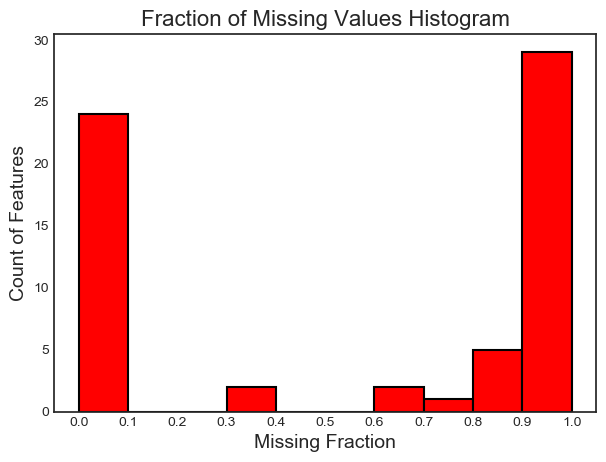

In [117]:
# Plot the Histogram for missing features
fs.plot_missing()

In [118]:
# Top 12 Missing features Perecentage
fs.missing_stats.head(12)

,missing_fraction
AirTransportation,0.999584
UseOfAgrlMachinery,0.998682
SystemicPoisoning_other,0.998058
Firearm,0.997711
Drowning,0.997711
Railway,0.997364
Pollution_ToxicExposure,0.997295
Oil_gasExtraction,0.996879
SystemicPoisoning_toxic,0.996463
HearingLoss,0.995838


In [119]:
#Finding Single Unique value
fs.identify_single_unique()

38 features with a single unique value.



In [123]:
#Collinear (highly correlated) Features
fs.identify_collinear(correlation_threshold=0.80)

2 features with a correlation magnitude greater than 0.80.



In [124]:
correlated_features = fs.ops['collinear']
correlated_features[:2]

['AnyMultipleInterestedparties', 'PolicyLimitPerInjury']

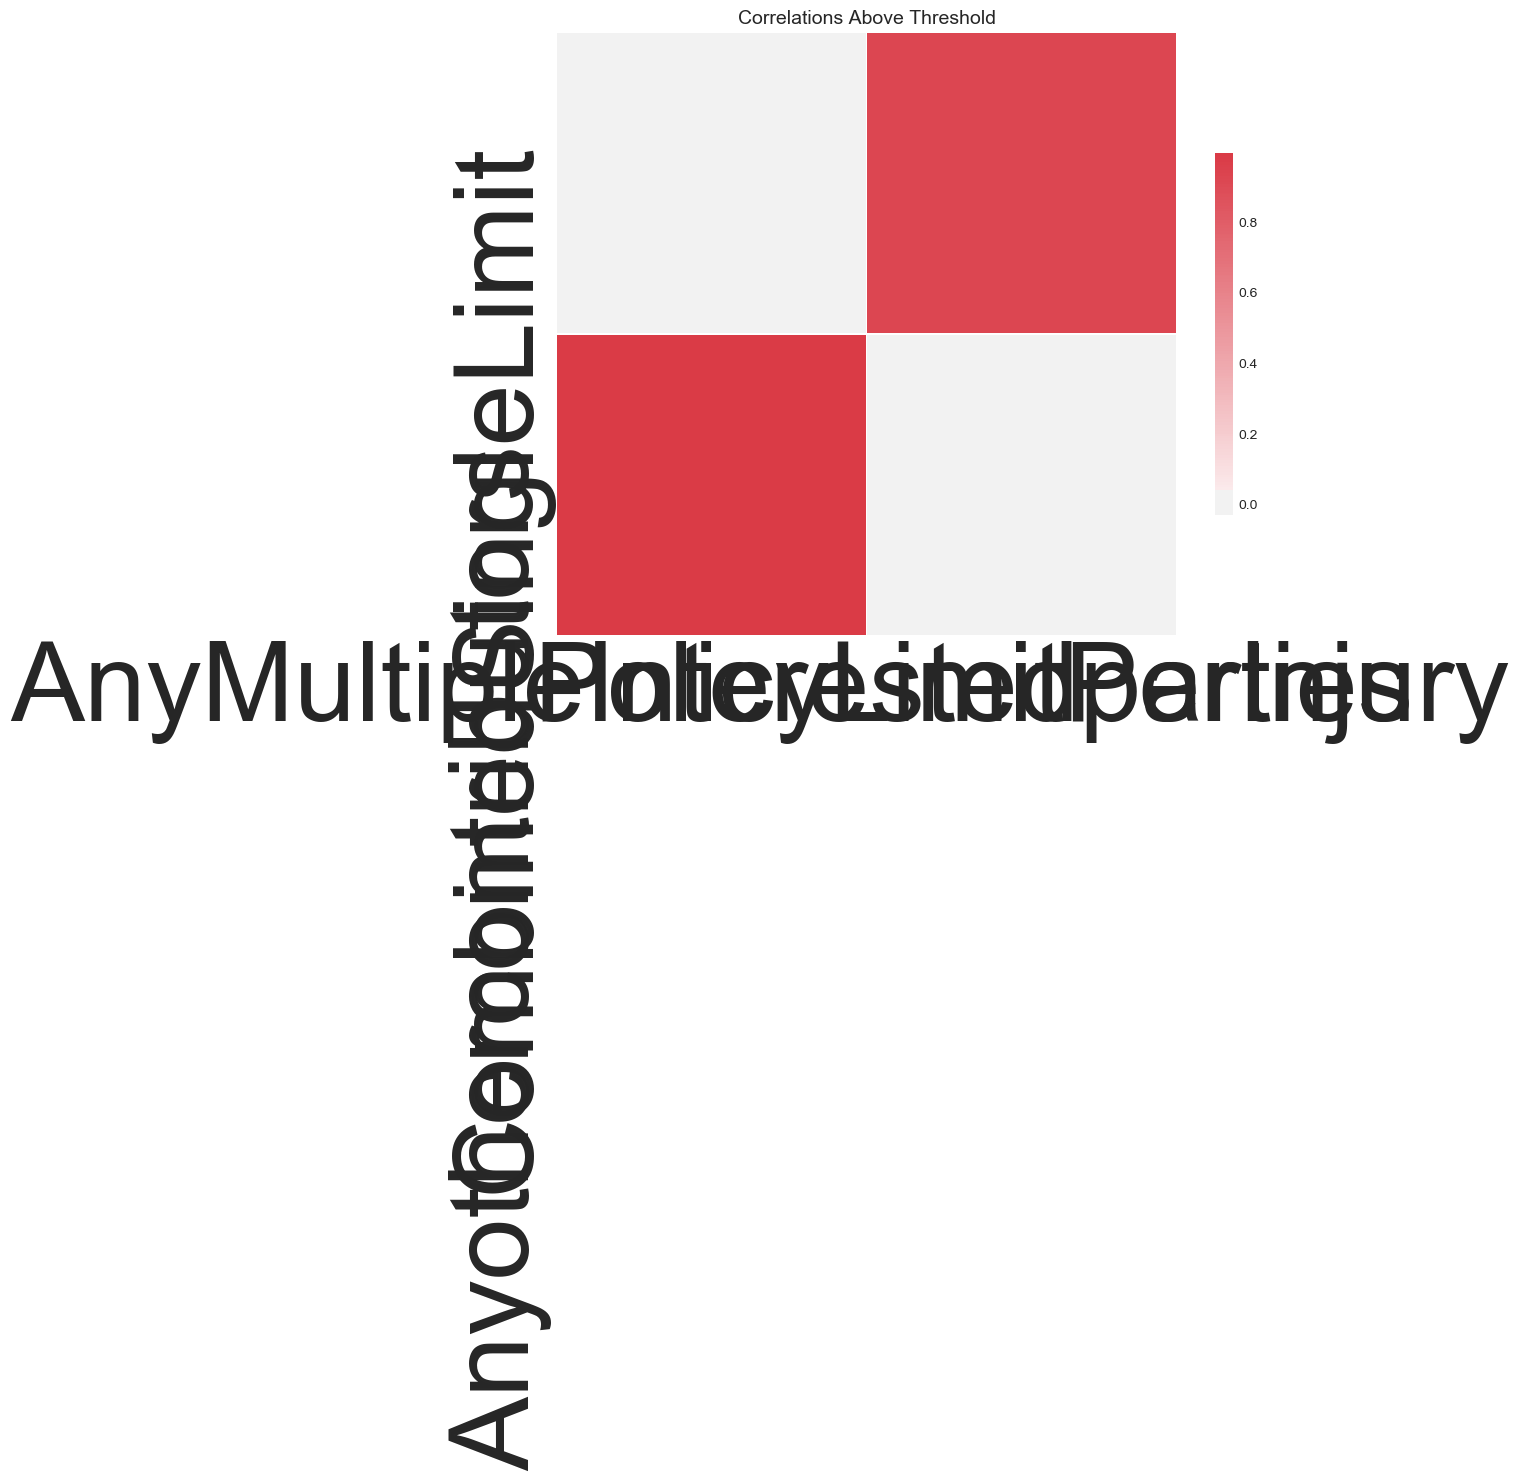

In [125]:
fs.plot_collinear()

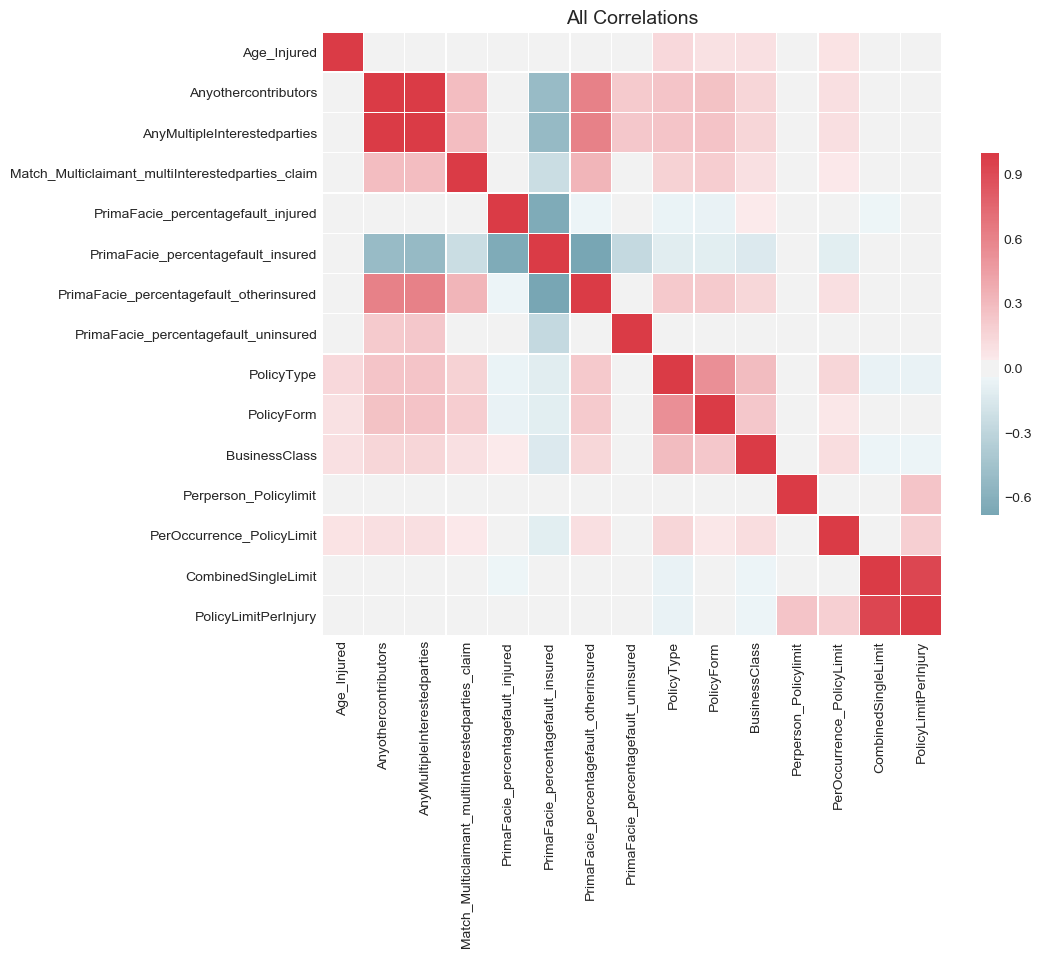

In [126]:
fs.plot_collinear(plot_all=True)

2 features with a correlation magnitude greater than 0.80.



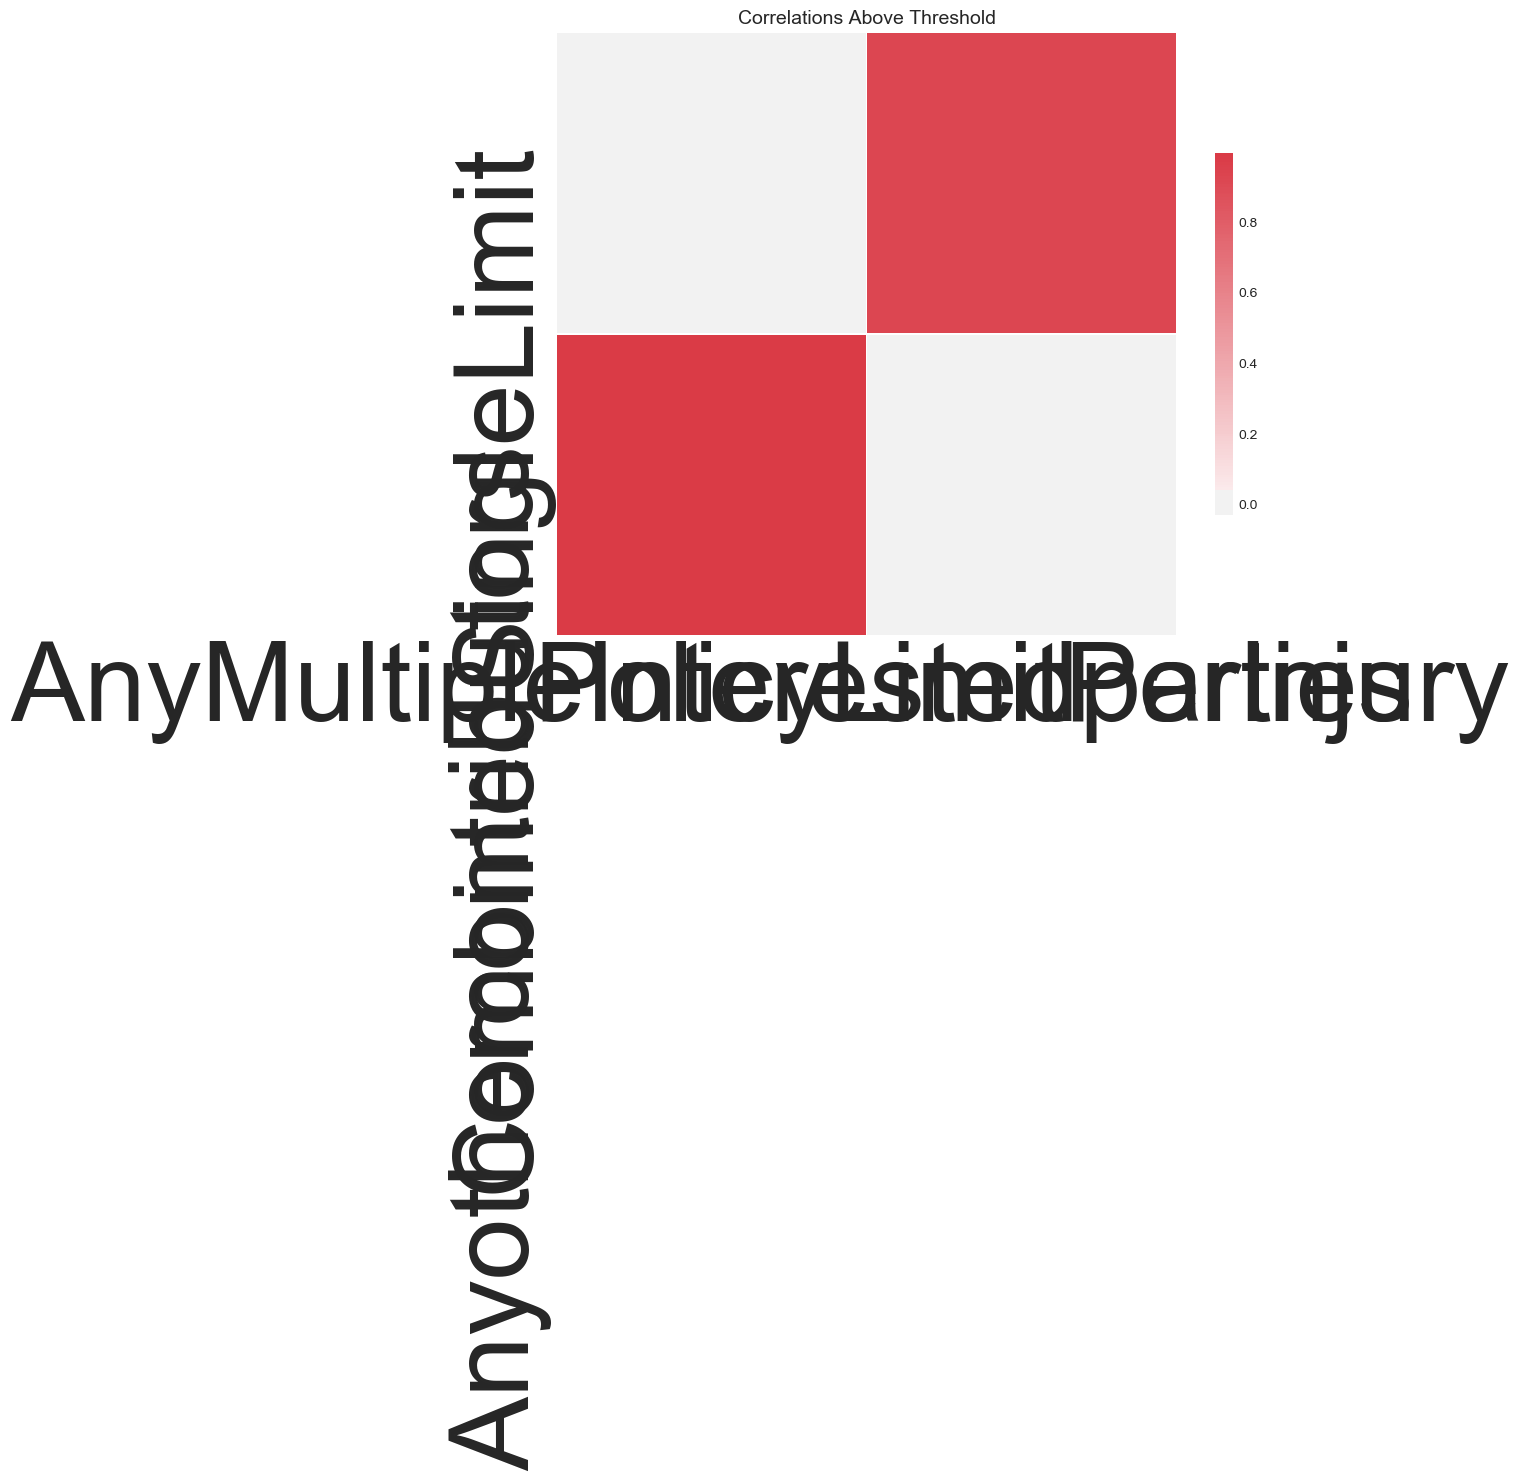

In [127]:
fs.identify_collinear(correlation_threshold=0.80)
fs.plot_collinear()

In [128]:
fs.record_collinear

,drop_feature,corr_feature,corr_value
0,AnyMultipleInterestedparties,Anyothercontributors,0.995374
1,PolicyLimitPerInjury,CombinedSingleLimit,0.928460


In [133]:
#Identifying the Zero Importance Feature
fs.identify_zero_importance(task = 'classification',  
                            n_iterations = 10, early_stopping = False)

Training Gradient Boosting Model


19937 features with zero importance after one-hot encoding.



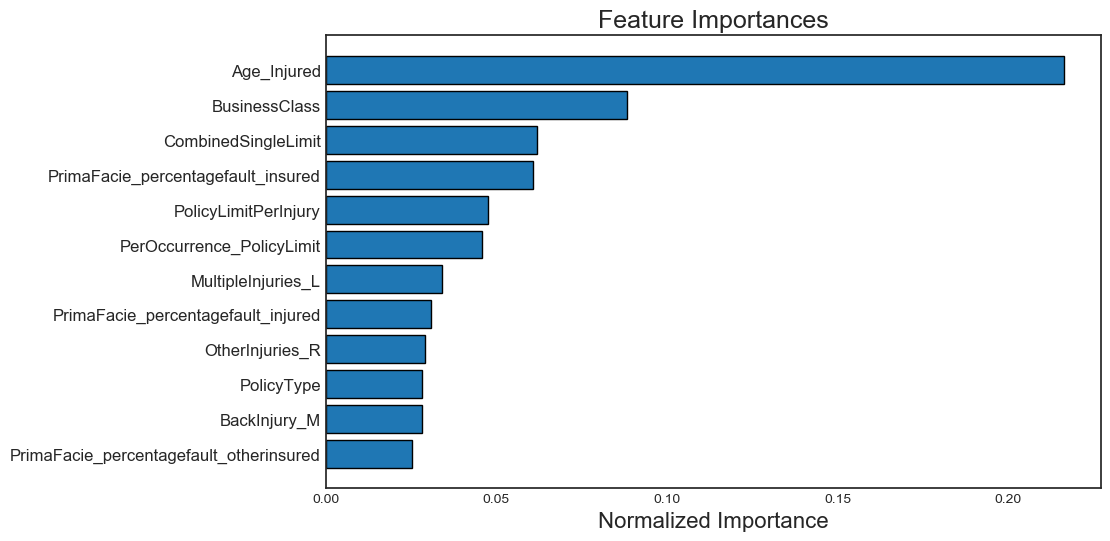

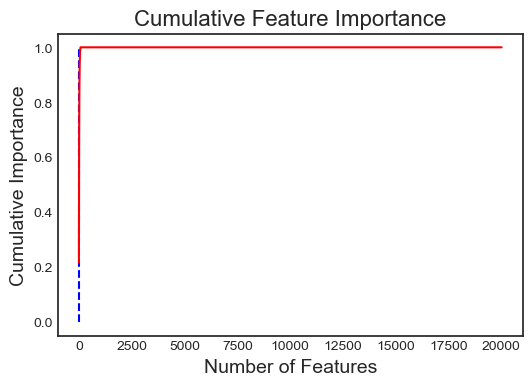

19 features required for 0.80 of cumulative importance


In [134]:
fs.plot_feature_importances(threshold = 0.80, plot_n = 12)

In [135]:
fs.feature_importances.head(15)

,feature,importance,normalized_importance,cumulative_importance
0,Age_Injured,19473.0,0.216367,0.216367
1,BusinessClass,7939.0,0.088211,0.304578
2,CombinedSingleLimit,5574.0,0.061933,0.366511
3,PrimaFacie_percentagefault_insured,5456.0,0.060622,0.427133
4,PolicyLimitPerInjury,4274.0,0.047489,0.474622
5,PerOccurrence_PolicyLimit,4129.0,0.045878,0.520500
6,MultipleInjuries_L,3058.0,0.033978,0.554478
7,PrimaFacie_percentagefault_injured,2768.0,0.030756,0.585233
8,OtherInjuries_R,2618.0,0.029089,0.614322
9,PolicyType,2550.0,0.028333,0.642656


In [138]:
fs.identify_low_importance(cumulative_importance = 0.90)

29 features required for cumulative importance of 0.90 after one hot encoding.
19985 features do not contribute to cumulative importance of 0.90.



In [139]:
low_importance_features = fs.ops['low_importance']
low_importance_features[:5]

['Burns_heat_C',
 'Eye_injury_blindness_G',
 'PolicyForm',
 'CirculatoryCondition_K',
 'Medicare_Medicaid_Y']

In [140]:
train_no_missing = fs.remove(methods = ['missing'])

Removed 39 features.


In [141]:
train_no_missing_zero = fs.remove(methods = ['missing', 'zero_importance'])

Removed 19976 features.


In [142]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 20042 features including one-hot features.


In [143]:
train.columns

Index(['Injury_Date', 'Date_reported', 'Age_Injured',
       'Work_related_injury_status', 'Amputation', 'Death', 'Burns_heat',
       'Burns_chemical', 'SystemicPoisoning_toxic', 'SystemicPoisoning_other',
       'Eye_injury_blindness', 'RespiratoryCondition', 'NervousCondition',
       'HearingLoss', 'CirculatoryCondition', 'MultipleInjuries', 'BackInjury',
       'SkinDisorder', 'BrainDamage', 'Scarring', 'SpinalCordInjuries',
       'OtherInjuries', 'OffRoadVehicle', 'AirTransportation', 'Railway',
       'OtherMotorVehicle', 'SurgicalCare', 'Falls', 'Drowning',
       'UseOfDefectiveProduct', 'Fire', 'Firearm', 'Pollution_ToxicExposure',
       'Explosions', 'UseOfAgrlMachinery', 'Oil_gasExtraction',
       'OtherModeOfInjury', 'Non_economicloss', 'Exemplarydamages',
       'WhetherPrimaFacie_JointandSeveralLiability', 'WorkersCompAvailability',
       'CollateralSourcesAvailability', 'MedicalInsurance',
       'DisabilityInsurance', 'SocialSecurityBenefits', 'Medicare_Medicaid',


In [144]:
test.columns

Index(['Injury_Date', 'Date_reported', 'Age_Injured',
       'Work_related_injury_status', 'Amputation', 'Death', 'Burns_heat',
       'Burns_chemical', 'SystemicPoisoning_toxic', 'SystemicPoisoning_other',
       'Eye_injury_blindness', 'RespiratoryCondition', 'NervousCondition',
       'HearingLoss', 'CirculatoryCondition', 'MultipleInjuries', 'BackInjury',
       'SkinDisorder', 'BrainDamage', 'Scarring', 'SpinalCordInjuries',
       'OtherInjuries', 'OffRoadVehicle', 'AirTransportation', 'Railway',
       'OtherMotorVehicle', 'SurgicalCare', 'Falls', 'Drowning',
       'UseOfDefectiveProduct', 'Fire', 'Firearm', 'Pollution_ToxicExposure',
       'Explosions', 'UseOfAgrlMachinery', 'Oil_gasExtraction',
       'OtherModeOfInjury', 'Non_economicloss', 'Exemplarydamages',
       'WhetherPrimaFacie_JointandSeveralLiability', 'WorkersCompAvailability',
       'CollateralSourcesAvailability', 'MedicalInsurance',
       'DisabilityInsurance', 'SocialSecurityBenefits', 'Medicare_Medicaid',


In [168]:
col_names = train_removed_all.columns
for cols in test.columns:
    if cols not in col_names:
        test = test.drop(cols,axis=1)

KeyboardInterrupt: 

In [230]:
train = train_removed_all
train.columns

Index(['Injury_Date', 'Date_reported', 'Age_Injured', 'Non_economicloss',
       'Exemplarydamages', 'WhetherPrimaFacie_JointandSeveralLiability',
       'WorkersCompAvailability', 'CollateralSourcesAvailability',
       'Anyothercontributors', 'PrimaFacie_percentagefault_injured',
       'PrimaFacie_percentagefault_insured',
       'PrimaFacie_percentagefault_otherinsured',
       'PrimaFacie_percentagefault_uninsured', 'PolicyID', 'PolicyType',
       'Employment_status', 'BusinessClass', 'Perperson_Policylimit',
       'PerOccurrence_PolicyLimit', 'CombinedSingleLimit'],
      dtype='object')

In [231]:
train_labels.value_counts()

lessthan100K         7427
100K-lessthan200K    3768
200KandAbove         3222
Name: ClaimSize, dtype: int64

In [232]:
train.shape

(14417, 20)

In [233]:
train.columns

Index(['Injury_Date', 'Date_reported', 'Age_Injured', 'Non_economicloss',
       'Exemplarydamages', 'WhetherPrimaFacie_JointandSeveralLiability',
       'WorkersCompAvailability', 'CollateralSourcesAvailability',
       'Anyothercontributors', 'PrimaFacie_percentagefault_injured',
       'PrimaFacie_percentagefault_insured',
       'PrimaFacie_percentagefault_otherinsured',
       'PrimaFacie_percentagefault_uninsured', 'PolicyID', 'PolicyType',
       'Employment_status', 'BusinessClass', 'Perperson_Policylimit',
       'PerOccurrence_PolicyLimit', 'CombinedSingleLimit'],
      dtype='object')

In [234]:
train.dtypes

Injury_Date                                   category
Date_reported                                 category
Age_Injured                                    float64
Non_economicloss                              category
Exemplarydamages                              category
WhetherPrimaFacie_JointandSeveralLiability    category
WorkersCompAvailability                       category
CollateralSourcesAvailability                 category
Anyothercontributors                           float64
PrimaFacie_percentagefault_injured             float64
PrimaFacie_percentagefault_insured             float64
PrimaFacie_percentagefault_otherinsured        float64
PrimaFacie_percentagefault_uninsured           float64
PolicyID                                      category
PolicyType                                     float64
Employment_status                             category
BusinessClass                                  float64
Perperson_Policylimit                          float64
PerOccurre

In [235]:
test.dtypes

Injury_Date                                         category
Date_reported                                       category
Age_Injured                                          float64
Work_related_injury_status                          category
Amputation                                          category
Death                                               category
Burns_heat                                          category
Burns_chemical                                      category
SystemicPoisoning_toxic                             category
SystemicPoisoning_other                             category
Eye_injury_blindness                                category
RespiratoryCondition                                category
NervousCondition                                    category
HearingLoss                                         category
CirculatoryCondition                                category
MultipleInjuries                                    category
BackInjury              

In [236]:
col_names = list(train.columns.values)

In [237]:
test = pd.DataFrame(test,columns = col_names )

In [238]:
test.dtypes

Injury_Date                                   category
Date_reported                                 category
Age_Injured                                    float64
Non_economicloss                              category
Exemplarydamages                              category
WhetherPrimaFacie_JointandSeveralLiability    category
WorkersCompAvailability                       category
CollateralSourcesAvailability                 category
Anyothercontributors                             int64
PrimaFacie_percentagefault_injured               int64
PrimaFacie_percentagefault_insured               int64
PrimaFacie_percentagefault_otherinsured          int64
PrimaFacie_percentagefault_uninsured             int64
PolicyID                                      category
PolicyType                                       int64
Employment_status                             category
BusinessClass                                    int64
Perperson_Policylimit                            int64
PerOccurre

In [239]:
print(train.shape, test.shape)

(14417, 20) (4806, 20)


In [240]:
train.isnull().sum()

Injury_Date                                   0
Date_reported                                 0
Age_Injured                                   0
Non_economicloss                              0
Exemplarydamages                              0
WhetherPrimaFacie_JointandSeveralLiability    0
WorkersCompAvailability                       0
CollateralSourcesAvailability                 0
Anyothercontributors                          0
PrimaFacie_percentagefault_injured            0
PrimaFacie_percentagefault_insured            0
PrimaFacie_percentagefault_otherinsured       0
PrimaFacie_percentagefault_uninsured          0
PolicyID                                      0
PolicyType                                    0
Employment_status                             0
BusinessClass                                 0
Perperson_Policylimit                         0
PerOccurrence_PolicyLimit                     0
CombinedSingleLimit                           0
dtype: int64

In [241]:
test.isnull().sum()

Injury_Date                                   0
Date_reported                                 0
Age_Injured                                   0
Non_economicloss                              0
Exemplarydamages                              0
WhetherPrimaFacie_JointandSeveralLiability    0
WorkersCompAvailability                       0
CollateralSourcesAvailability                 0
Anyothercontributors                          0
PrimaFacie_percentagefault_injured            0
PrimaFacie_percentagefault_insured            0
PrimaFacie_percentagefault_otherinsured       0
PrimaFacie_percentagefault_uninsured          0
PolicyID                                      0
PolicyType                                    0
Employment_status                             0
BusinessClass                                 0
Perperson_Policylimit                         0
PerOccurrence_PolicyLimit                     0
CombinedSingleLimit                           0
dtype: int64

In [242]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14417 entries, 0 to 14416
Data columns (total 20 columns):
Injury_Date                                   14417 non-null category
Date_reported                                 14417 non-null category
Age_Injured                                   14417 non-null float64
Non_economicloss                              14417 non-null category
Exemplarydamages                              14417 non-null category
WhetherPrimaFacie_JointandSeveralLiability    14417 non-null category
WorkersCompAvailability                       14417 non-null category
CollateralSourcesAvailability                 14417 non-null category
Anyothercontributors                          14417 non-null float64
PrimaFacie_percentagefault_injured            14417 non-null float64
PrimaFacie_percentagefault_insured            14417 non-null float64
PrimaFacie_percentagefault_otherinsured       14417 non-null float64
PrimaFacie_percentagefault_uninsured          14417 non-

In [243]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4806 entries, 0 to 4805
Data columns (total 20 columns):
Injury_Date                                   4806 non-null category
Date_reported                                 4806 non-null category
Age_Injured                                   4806 non-null float64
Non_economicloss                              4806 non-null category
Exemplarydamages                              4806 non-null category
WhetherPrimaFacie_JointandSeveralLiability    4806 non-null category
WorkersCompAvailability                       4806 non-null category
CollateralSourcesAvailability                 4806 non-null category
Anyothercontributors                          4806 non-null int64
PrimaFacie_percentagefault_injured            4806 non-null int64
PrimaFacie_percentagefault_insured            4806 non-null int64
PrimaFacie_percentagefault_otherinsured       4806 non-null int64
PrimaFacie_percentagefault_uninsured          4806 non-null int64
PolicyID    

In [248]:
numerical_Attributes_train
categorical_Attributes_train
numerical_Attributes_test

Index(['Age_Injured', 'Anyothercontributors',
       'PrimaFacie_percentagefault_injured',
       'PrimaFacie_percentagefault_insured',
       'PrimaFacie_percentagefault_otherinsured',
       'PrimaFacie_percentagefault_uninsured', 'PolicyType', 'BusinessClass',
       'Perperson_Policylimit', 'PerOccurrence_PolicyLimit',
       'CombinedSingleLimit'],
      dtype='object')

In [249]:
# Data Imputation
# Impute missing values with mean Imputation in Train
from sklearn.preprocessing import Imputer
num_mean_imputer = Imputer(strategy="mean")
for cols in numerical_Attributes_train :
    train[cols] = num_mean_imputer.fit_transform(train[[cols]])

In [250]:
# Data Imputation
# Impute missing values with mean Imputation in Test

from sklearn.preprocessing import Imputer
num_mean_imputer = Imputer(strategy="mean")
for cols in numerical_Attributes_test :
    test[cols] = num_mean_imputer.fit_transform(test[[cols]])

In [251]:
print(train.shape, test.shape)

(14417, 20) (4806, 20)


In [252]:
train.isnull().sum()

Injury_Date                                   0
Date_reported                                 0
Age_Injured                                   0
Non_economicloss                              0
Exemplarydamages                              0
WhetherPrimaFacie_JointandSeveralLiability    0
WorkersCompAvailability                       0
CollateralSourcesAvailability                 0
Anyothercontributors                          0
PrimaFacie_percentagefault_injured            0
PrimaFacie_percentagefault_insured            0
PrimaFacie_percentagefault_otherinsured       0
PrimaFacie_percentagefault_uninsured          0
PolicyID                                      0
PolicyType                                    0
Employment_status                             0
BusinessClass                                 0
Perperson_Policylimit                         0
PerOccurrence_PolicyLimit                     0
CombinedSingleLimit                           0
dtype: int64

In [253]:
test.isnull().sum()

Injury_Date                                   0
Date_reported                                 0
Age_Injured                                   0
Non_economicloss                              0
Exemplarydamages                              0
WhetherPrimaFacie_JointandSeveralLiability    0
WorkersCompAvailability                       0
CollateralSourcesAvailability                 0
Anyothercontributors                          0
PrimaFacie_percentagefault_injured            0
PrimaFacie_percentagefault_insured            0
PrimaFacie_percentagefault_otherinsured       0
PrimaFacie_percentagefault_uninsured          0
PolicyID                                      0
PolicyType                                    0
Employment_status                             0
BusinessClass                                 0
Perperson_Policylimit                         0
PerOccurrence_PolicyLimit                     0
CombinedSingleLimit                           0
dtype: int64

In [254]:
train.dtypes

Injury_Date                                   category
Date_reported                                 category
Age_Injured                                    float64
Non_economicloss                              category
Exemplarydamages                              category
WhetherPrimaFacie_JointandSeveralLiability    category
WorkersCompAvailability                       category
CollateralSourcesAvailability                 category
Anyothercontributors                           float64
PrimaFacie_percentagefault_injured             float64
PrimaFacie_percentagefault_insured             float64
PrimaFacie_percentagefault_otherinsured        float64
PrimaFacie_percentagefault_uninsured           float64
PolicyID                                      category
PolicyType                                     float64
Employment_status                             category
BusinessClass                                  float64
Perperson_Policylimit                          float64
PerOccurre

In [255]:
train.head(5)

,Injury_Date,Date_reported,Age_Injured,Non_economicloss,Exemplarydamages,WhetherPrimaFacie_JointandSeveralLiability,WorkersCompAvailability,CollateralSourcesAvailability,Anyothercontributors,PrimaFacie_percentagefault_injured,PrimaFacie_percentagefault_insured,PrimaFacie_percentagefault_otherinsured,PrimaFacie_percentagefault_uninsured,PolicyID,PolicyType,Employment_status,BusinessClass,Perperson_Policylimit,PerOccurrence_PolicyLimit,CombinedSingleLimit
0,3/9/2000,2000-03-23,59.0,No,No,N,N,N,1.0,50.0,50.0,0.0,0.0,P280529,1.0,Y,17.0,0.0,0.0,5000000.0
1,12/6/2002,2002-12-10,37.0,No,No,N,N,N,1.0,0.0,100.0,0.0,0.0,P290153,2.0,Y,9.0,0.0,5000000.0,0.0
2,10/20/2000,2000-11-02,37.0,No,No,N,N,N,1.0,0.0,100.0,0.0,0.0,P282861,2.0,Y,6.0,0.0,0.0,5000000.0
3,8/9/2003,2003-08-11,16.0,No,No,N,N,N,2.0,0.0,50.0,50.0,0.0,P291972,4.0,N,20.0,0.0,1000000.0,3000000.0
4,2/25/2004,2004-02-26,52.0,No,No,N,N,N,1.0,0.0,100.0,0.0,0.0,P293075,2.0,N,6.0,0.0,1000000.0,0.0


In [256]:
# Dropping Date and ID varaibles from both train and test
train = train.drop(['Injury_Date', 'Date_reported','PolicyID'],axis=1)

In [257]:
test = test.drop(['Injury_Date', 'Date_reported','PolicyID'],axis=1)

In [258]:
print(train.shape,test.shape)

(14417, 17) (4806, 17)


In [260]:
categorical_Attributes_train = train.select_dtypes(include=['category']).columns

In [261]:
categorical_Attributes_test = test.select_dtypes(include=['category']).columns

In [262]:
numerical_Attributes_train = train.select_dtypes(exclude=['category']).columns

In [263]:
numerical_Attributes_test = test.select_dtypes(exclude=['category']).columns

In [264]:
train = pd.get_dummies(columns=categorical_Attributes_train,data=train,prefix=categorical_Attributes_train,prefix_sep="_",drop_first=True)

In [265]:
test = pd.get_dummies(columns=categorical_Attributes_test,data=test,prefix=categorical_Attributes_test,prefix_sep="_",drop_first=True)

In [266]:
print(train.shape, test.shape)

(14417, 17) (4806, 17)


In [268]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14417 entries, 0 to 14416
Data columns (total 17 columns):
Age_Injured                                     14417 non-null float64
Anyothercontributors                            14417 non-null float64
PrimaFacie_percentagefault_injured              14417 non-null float64
PrimaFacie_percentagefault_insured              14417 non-null float64
PrimaFacie_percentagefault_otherinsured         14417 non-null float64
PrimaFacie_percentagefault_uninsured            14417 non-null float64
PolicyType                                      14417 non-null float64
BusinessClass                                   14417 non-null float64
Perperson_Policylimit                           14417 non-null float64
PerOccurrence_PolicyLimit                       14417 non-null float64
CombinedSingleLimit                             14417 non-null float64
Non_economicloss_Yes                            14417 non-null uint8
Exemplarydamages_Yes                     

In [269]:
# Split the Train and Test Data
from sklearn.model_selection import train_test_split
# Split the data into X and y
X = train
y = train_labels

In [270]:
## Split the data into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

In [271]:
## Print the shape of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11533, 17)
(2884, 17)
(11533,)
(2884,)


In [273]:
train.dtypes
train.shape

(14417, 17)

In [274]:
## Scale the numeric attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train.iloc[:,0:17])

X_train.iloc[:,0:17] = scaler.transform(X_train.iloc[:,0:17])
X_test.iloc[:,0:17] = scaler.transform(X_test.iloc[:,0:17])


In [275]:
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

       Age_Injured  Anyothercontributors  PrimaFacie_percentagefault_injured  \
12025    -0.538490              2.032885                           -0.392552   
6258     -1.024299             -0.491912                            2.628992   
14116    -1.327930             -0.491912                           -0.392552   
4622     -0.599216             -0.491912                           -0.392552   
6289     -0.356311              2.032885                           -0.392552   

       PrimaFacie_percentagefault_insured  \
12025                           -2.903623   
6258                            -1.518238   
14116                            0.519093   
4622                             0.519093   
6289                            -1.518238   

       PrimaFacie_percentagefault_otherinsured  \
12025                                 4.430824   
6258                                 -0.305791   
14116                                -0.305791   
4622                                 -0.305791  

In [276]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [279]:
# Building Models
#Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
import numpy as np
nav_model = GaussianNB()
model_train_nav=nav_model.fit(X_train, y_train)
y_pred_train_nav = nav_model.predict(X_train)
y_pred_test_nav= nav_model.predict(X_test)
y_prob_test_nav=  nav_model.predict_proba(X_test)[:,1]
acc_train_nav =accuracy_score(y_true=y_train,y_pred=y_pred_train_nav)
acc_test_nav = accuracy_score(y_true=y_test,y_pred=y_pred_test_nav)                          
print("Train Nav Accuracy :",accuracy_score(y_true=y_train,y_pred=y_pred_train_nav))
print("Test Nav Accuracy :",accuracy_score(y_true=y_test,y_pred=y_pred_test_nav))

Train Nav Accuracy : 0.39035810283534206
Test Nav Accuracy : 0.3855755894590846


In [281]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_nav = confusion_matrix(y_test, y_pred_test_nav)
cr_nav = classification_report(y_test,y_pred_test_nav)
print("\n Confusion matrix \n", confusion_matrix_test_nav)
print("\n Classification report \n", classification_report(y_test,y_pred_test_nav))



 Confusion matrix 
 [[ 639   38   65]
 [ 466   55  142]
 [1030   31  418]]

 Classification report 
                    precision    recall  f1-score   support

100K-lessthan200K       0.30      0.86      0.44       742
     200KandAbove       0.44      0.08      0.14       663
     lessthan100K       0.67      0.28      0.40      1479

      avg / total       0.52      0.39      0.35      2884



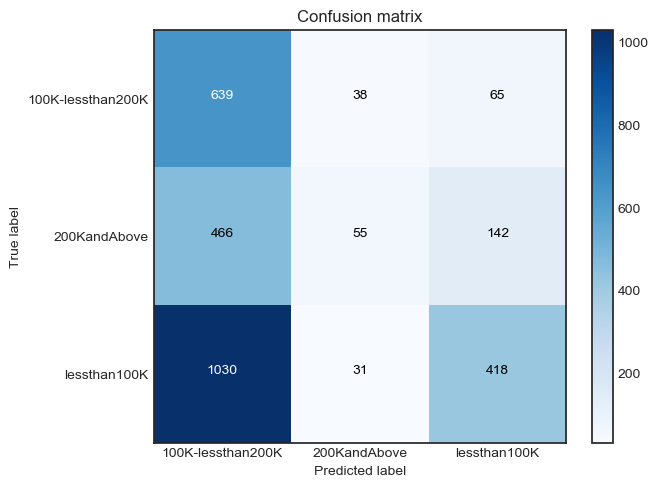

In [283]:
class_names = ['100K-lessthan200K','200KandAbove','lessthan100K']
plt.figure()
plot_confusion_matrix(confusion_matrix_test_nav , classes=class_names, title='Confusion matrix')
plt.show()

In [286]:
FP_nav = confusion_matrix_test_nav.sum(axis=0) - np.diag(confusion_matrix_test_nav)  
FN_nav= confusion_matrix_test_nav.sum(axis=1) - np.diag(confusion_matrix_test_nav)
TP_nav = np.diag(confusion_matrix_test_nav)
TN_nav = confusion_matrix_test_nav.sum() - (FP_nav + FN_nav + TP_nav)

FP_nav = FP_nav.astype(float)
FN_nav = FN_nav.astype(float)
TP_nav = TP_nav.astype(float)
TN_nav = TN_nav.astype(float)


# Sensitivity, hit rate, recall, or true positive rate
TPR_nav = TP_nav/(TP_nav+FN_nav)
print("Test TPR:", TPR_nav)
# Specificity or true negative rate
TNR_nav = TN_nav/(TN_nav+FP_nav) 
print("Test TNR:", TNR_nav)
# Precision or positive predictive value
PPV_nav = TP_nav/(TP_nav+FP_nav)
print("Test precision:", PPV_nav)
# Negative predictive value
NPV_nav = TN_nav/(TN_nav+FN_nav)
print("Test Negative predective:", NPV_nav)
# Fall out or false positive rate
FPR_nav = FP_nav/(FP_nav+TN_nav)
print("False positive rate:", FPR_nav)
# False negative rate
FNR_nav = FN_nav/(TP_nav+FN_nav)
print("False Negative Rate:", FNR_nav)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC_nav = (TP_nav+TN_nav)/(TP_nav+FP_nav+FN_nav+TN_nav)
print("overall accuracy:", ACC_nav)


Test TPR: [0.86118598 0.08295626 0.28262339]
Test TNR: [0.3015873  0.96893291 0.85266904]
Test precision: [0.29929742 0.44354839 0.6688    ]
Test Negative predective: [0.86248331 0.77971014 0.53032315]
False positive rate: [0.6984127  0.03106709 0.14733096]
False Negative Rate: [0.13881402 0.91704374 0.71737661]
overall accuracy: [0.44556172 0.76525659 0.56033287]


In [288]:
#Building the RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=40,random_state=0)
model_train_rfc= rfc.fit(X_train,y_train)
y_pred_train_rfc = rfc.predict(X_train)
y_pred_test_rfc = rfc.predict(X_test)

In [289]:
y_prob_test_rfc= rfc.predict_proba(X_test)[:,1]
acc_train_rfc = accuracy_score(y_true=y_train,y_pred=y_pred_train_rfc)
acc_test_rfc = accuracy_score(y_true=y_test,y_pred=y_pred_test_rfc)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_rfc))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_rfc))

Train Decision Tree Accuracy: 0.9241307552241395
Test Decision Tree Accuracy: 0.49826629680998613


In [290]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_rfc = confusion_matrix(y_test, y_pred_test_rfc)
print("\n Confusion matrix \n", confusion_matrix_test_rfc)
print("\n Classification report \n", classification_report(y_test,y_pred_test_rfc))


 Confusion matrix 
 [[ 227  147  368]
 [ 144  195  324]
 [ 267  197 1015]]

 Classification report 
                    precision    recall  f1-score   support

100K-lessthan200K       0.36      0.31      0.33       742
     200KandAbove       0.36      0.29      0.32       663
     lessthan100K       0.59      0.69      0.64      1479

      avg / total       0.48      0.50      0.49      2884



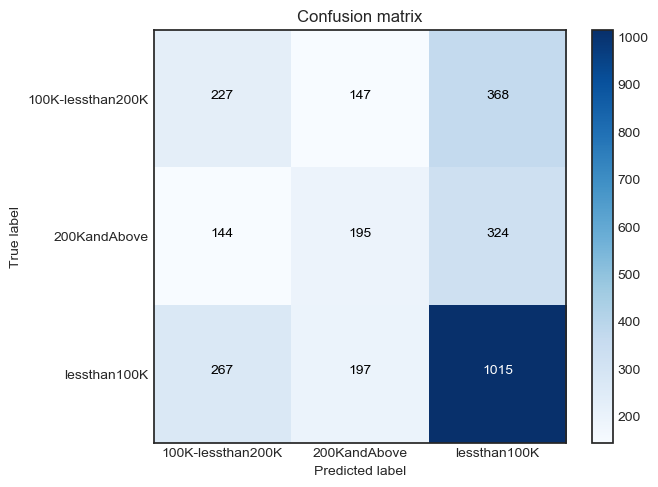

In [291]:
class_names = ['100K-lessthan200K','200KandAbove','lessthan100K']
plt.figure()
plot_confusion_matrix(confusion_matrix_test_rfc , classes=class_names, title='Confusion matrix')
plt.show()

In [ ]:
FP_nav = confusion_matrix_test_nav.sum(axis=0) - np.diag(confusion_matrix_test_nav)  
FN_nav= confusion_matrix_test_nav.sum(axis=1) - np.diag(confusion_matrix_test_nav)
TP_nav = np.diag(confusion_matrix_test_nav)
TN_nav = confusion_matrix_test_nav.sum() - (FP_nav + FN_nav + TP_nav)

FP_nav = FP_nav.astype(float)
FN_nav = FN_nav.astype(float)
TP_nav = TP_nav.astype(float)
TN_nav = TN_nav.astype(float)


# Sensitivity, hit rate, recall, or true positive rate
TPR_nav = TP_nav/(TP_nav+FN_nav)
print("Test TPR:", TPR_nav)
# Specificity or true negative rate
TNR_nav = TN_nav/(TN_nav+FP_nav) 
print("Test TNR:", TNR_nav)
# Precision or positive predictive value
PPV_nav = TP_nav/(TP_nav+FP_nav)
print("Test precision:", PPV_nav)
# Negative predictive value
NPV_nav = TN_nav/(TN_nav+FN_nav)
print("Test Negative predective:", NPV_nav)
# Fall out or false positive rate
FPR_nav = FP_nav/(FP_nav+TN_nav)
print("False positive rate:", FPR_nav)
# False negative rate
FNR_nav = FN_nav/(TP_nav+FN_nav)
print("False Negative Rate:", FNR_nav)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC_nav = (TP_nav+TN_nav)/(TP_nav+FP_nav+FN_nav+TN_nav)
print("overall accuracy:", ACC_nav)
